In [164]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2


Image de référence

In [165]:
myimage_crop=Image.open('crop_ref.png')
image_crop = np.array(myimage_crop)
#plt.imshow(image_crop)

In [166]:
longueur=image_crop.shape[0]
largeur=image_crop.shape[1]

In [167]:
graduation_crop=Image.open('crop_ref_taille_graduation.png')
graduation_image_crop = np.array(graduation_crop)
graduation=graduation_image_crop.shape[1]

Image à recadrer

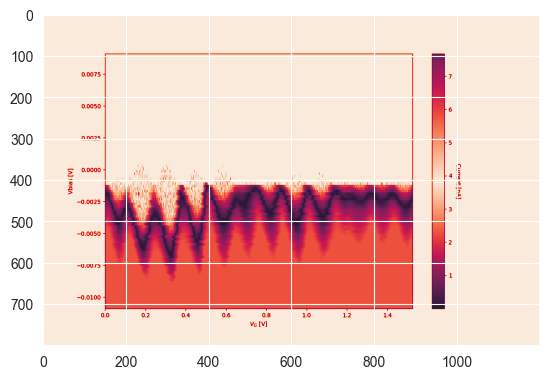

In [190]:
#myimg=Image.open('Stage_analyse_image/plot/good/sample-1S12_1_die-19-14_measurement-coulomb_diamond_zoom_exp_2.png')
#myimg = cv2.imread("Stage_analyse_image/D_.png", cv2.IMREAD_GRAYSCALE)
myimg = cv2.imread("Stage_analyse_image/sample-1S12_1_die-19-14_measurement-coulomb_diamond_zoom_exp_2.png", cv2.IMREAD_GRAYSCALE)
#myimg.show()
plt.imshow(myimg)
plt.show()

Rechercher la premère case pas blanche dans la première moitié verticale

In [191]:
for index, x in np.ndenumerate(myimg):    
    if x!=255:
        ind_debut=(index[0],index[1])
        if ind_debut[1]<=myimg.shape[1]/2:
            break
ind_debut

(95, 149)

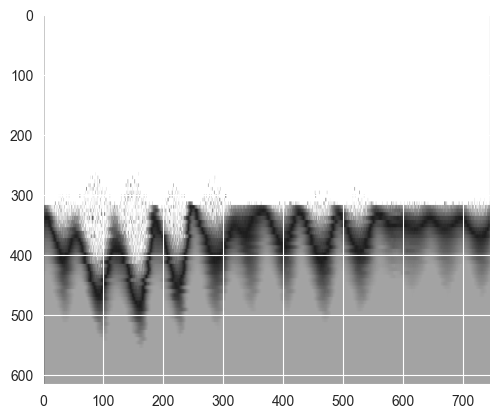

In [192]:
if 255 in myimg[ind_debut[0]][ind_debut[1]:ind_debut[1]+graduation]:
    image=myimg[ind_debut[0]:ind_debut[0]+longueur,ind_debut[1]+graduation:ind_debut[1]+largeur+graduation]
    plt.imshow(image,cmap='gray')
else:
    image=myimg[ind_debut[0]:ind_debut[0]+longueur,ind_debut[1]:ind_debut[1]+largeur]
    plt.imshow(image,cmap='gray')

Toutes les graduations ne sont pas au même endroit donc le premier pixel pas blanc va être soit sur le graphe, soit sur la graduation de l'axe donc il y a besoin de 2 cas différents pour croper l'image. 